In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import os
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from pykalman import KalmanFilter
from statistics import mean
from tqdm import tqdm

In [2]:
data=pd.read_csv("time_series_data_human_activities.csv")
data.head()

user activity      timestamp  x-axis  y-axis  z-axis
0     1  Walking  4991922345000    0.69   10.80   -2.03
1     1  Walking  4991972333000    6.85    7.44   -0.50
2     1  Walking  4992022351000    0.93    5.63   -0.50
3     1  Walking  4992072339000   -2.11    5.01   -0.69
4     1  Walking  4992122358000   -4.59    4.29   -1.95

In [3]:
#Splitting data
tmp=data.groupby('activity')['user'].unique()
l=[]
for i in tmp.keys():
    l.append(tmp[i])
from functools import reduce
comm=list(reduce(lambda i, j: i & j, (set(n) for n in l)))


In [4]:
def convert_float(x):
    a=x.real
    b=x.imag
    val=a+b 
    return val

416

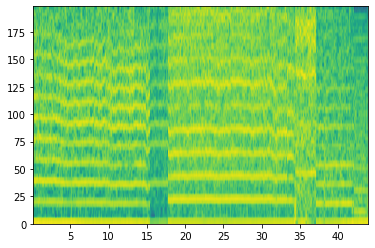

In [5]:
all=[]
for i in tmp.keys():
    for j in tmp[i]:
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])#129:416 #
        #x_plt=np.fft.fft(X)
        #all.append(len(x_plt))
        all.append(x_plt.shape[1])
min_len=min(all)
min_len

In [6]:
tmp.keys()

Index(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking'], dtype='object', name='activity')

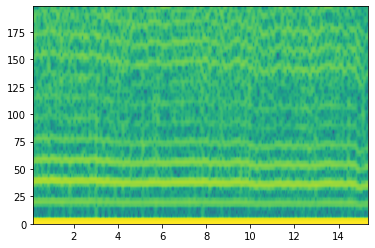

In [7]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

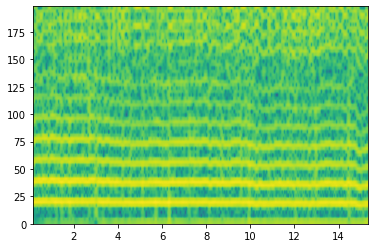

In [8]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

(65, 416)

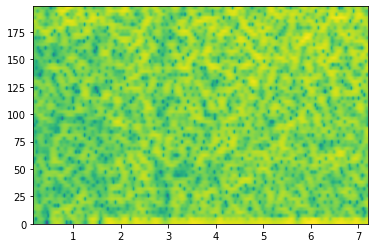

In [11]:
xyz=[]

j=33
i = 'Jogging'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
x_plt.shape


In [12]:
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(x_plt.T, em_vars='all').smooth(x_plt.T)
n_example=min_len

In [13]:
mu_n.shape

(416, 5)

<AxesSubplot:>

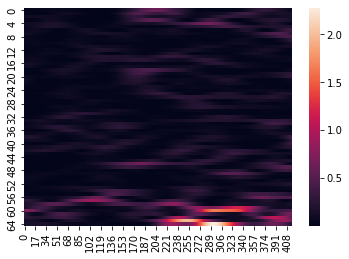

In [14]:
sns.heatmap(x_plt)

In [15]:
#@param X: a numpy 2D array whose dimension is [n_example, self.n_dim_obs]
#mu_n, V_n = self.smooth(X)

C_new = np.sum([np.outer(x_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))

<AxesSubplot:>

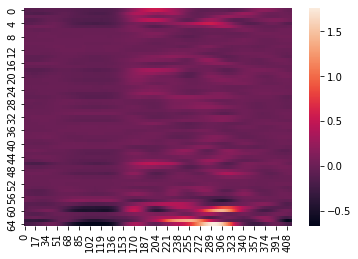

In [16]:
sns.heatmap(C_new@mu_n.T)

In [17]:
C_new.shape

(65, 5)

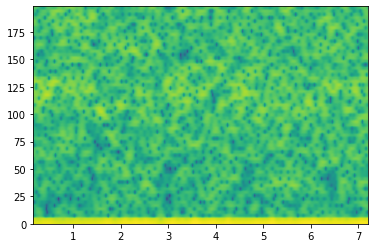

In [18]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

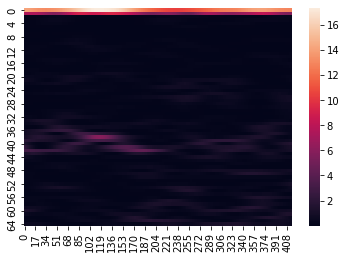

In [19]:
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(y_plt.T, em_vars='all').smooth(y_plt.T)
n_example=min_len
sns.heatmap(y_plt)

<AxesSubplot:>

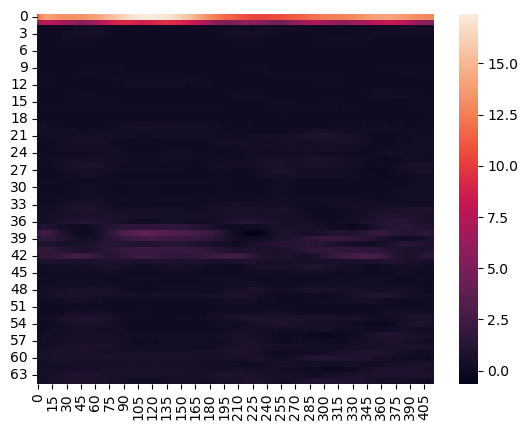

In [56]:
C_new = np.sum([np.outer(y_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
sns.heatmap(C_new@mu_n.T)

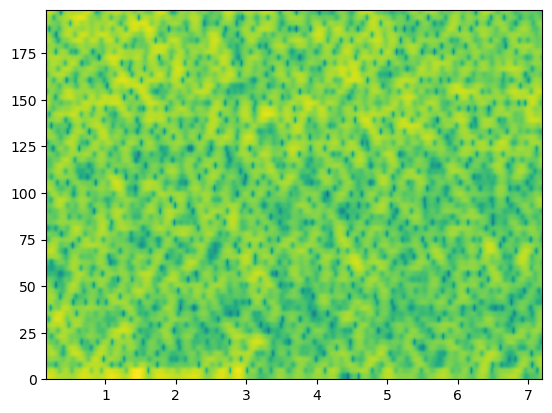

In [18]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

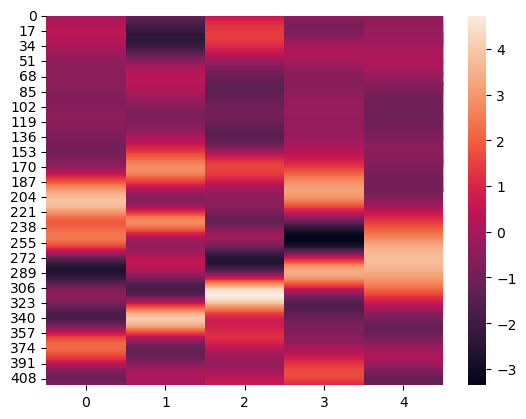

In [8]:
xyz=[]

j=33
i = 'Jogging'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

xyz=np.concatenate((x_plt,y_plt,z_plt))
xyzt = xyz.T
kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
kf = kf.em(xyzt, em_vars='all')
sns.heatmap(kf.smooth(xyzt)[0])

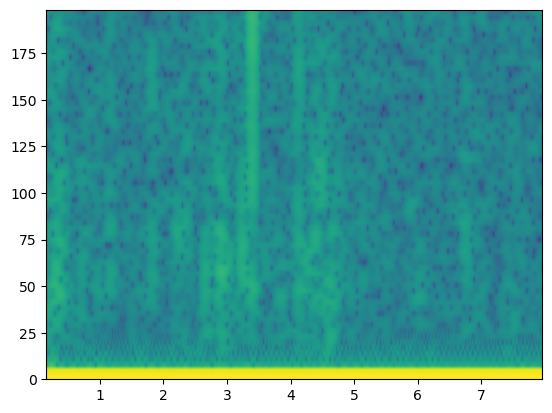

In [19]:
xyz=[]

j=33
i = 'Sitting'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]



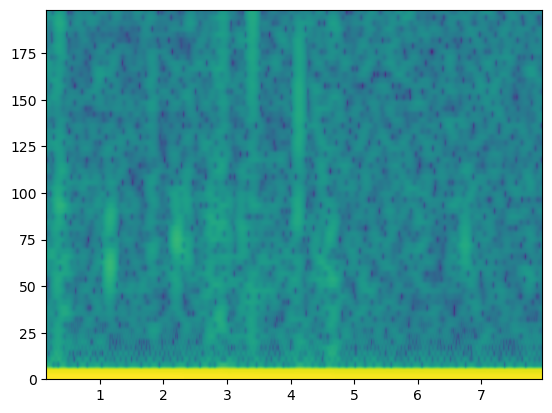

In [20]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

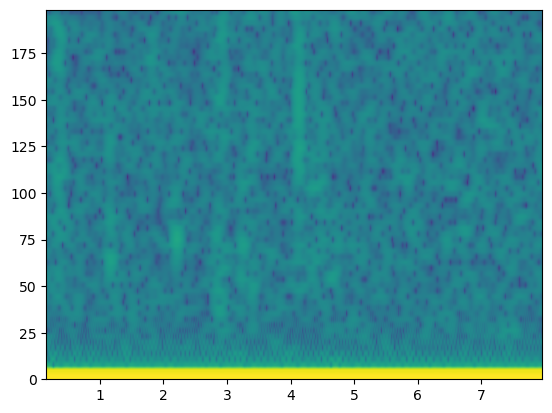

In [21]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

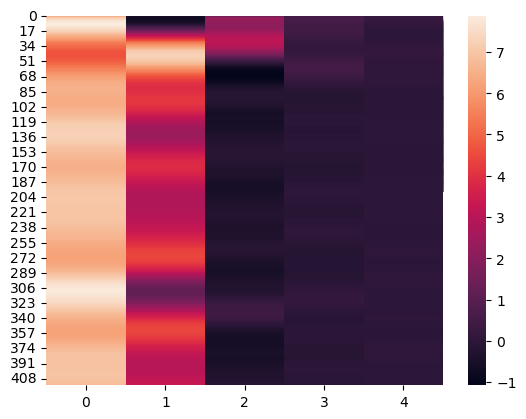

In [9]:
xyz=[]

j=33
i = 'Sitting'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

xyz=np.concatenate((x_plt,y_plt,z_plt))
xyzt = xyz.T
kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
kf = kf.em(xyzt, em_vars='all')
sns.heatmap(kf.smooth(xyzt)[0])

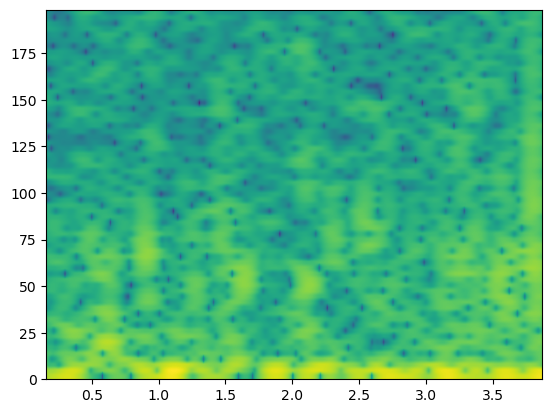

In [22]:
xyz=[]

j=33
i = 'Standing'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]



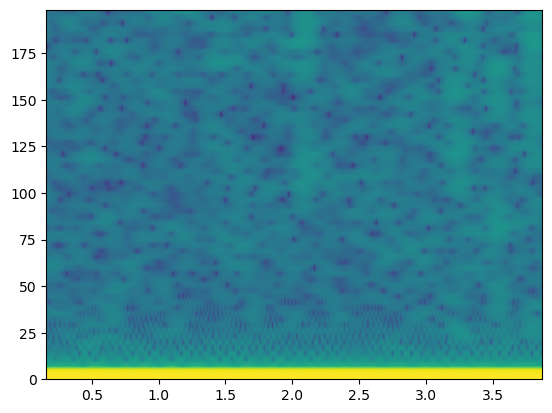

In [23]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

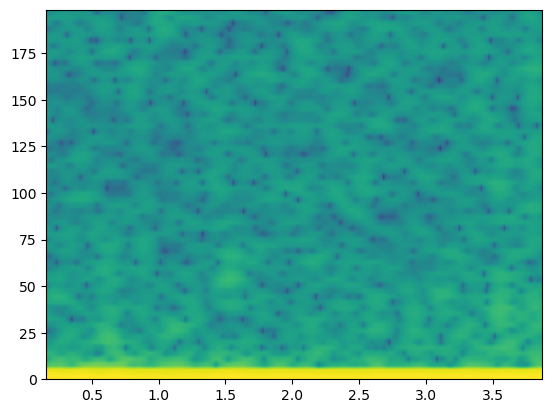

In [24]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

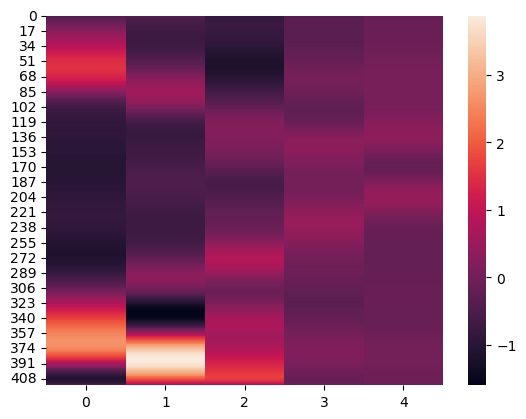

In [10]:
xyz=[]

j=33
i = 'Standing'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

xyz=np.concatenate((x_plt,y_plt,z_plt))
xyzt = xyz.T
kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
kf = kf.em(xyzt, em_vars='all')
sns.heatmap(kf.smooth(xyzt)[0])

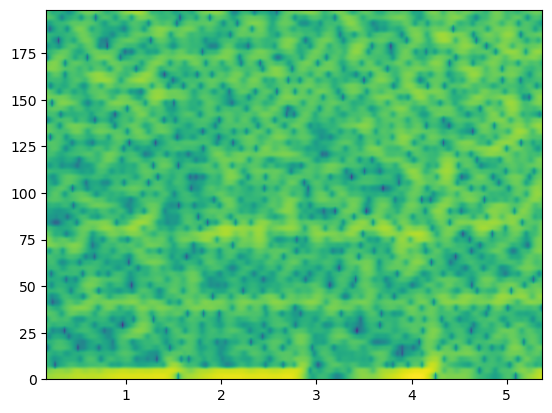

In [25]:
xyz=[]

j=33
i = 'Upstairs'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]



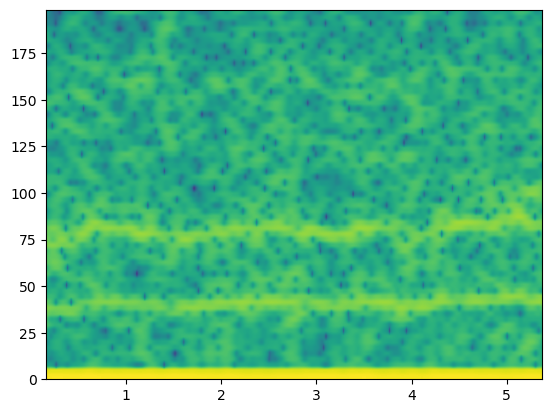

In [26]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

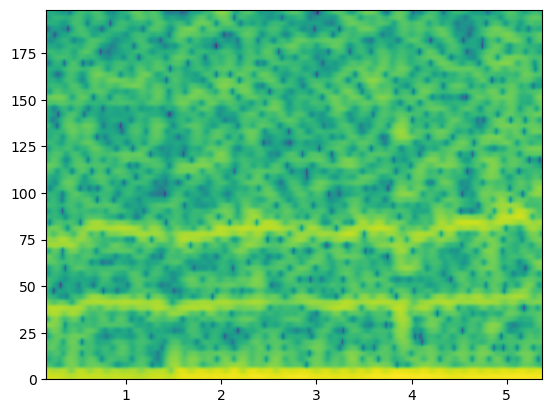

In [27]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

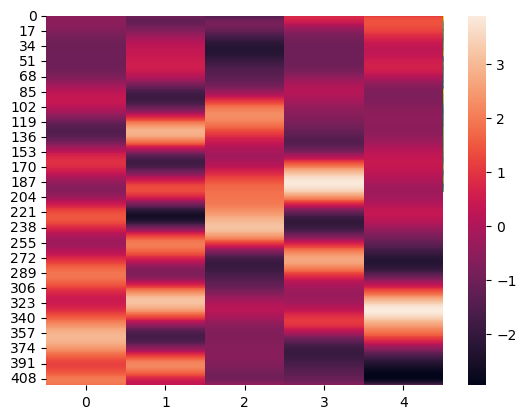

In [11]:
xyz=[]

j=33
i = 'Upstairs'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

xyz=np.concatenate((x_plt,y_plt,z_plt))
xyzt = xyz.T
kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
kf = kf.em(xyzt, em_vars='all')
sns.heatmap(kf.smooth(xyzt)[0])

<AxesSubplot:>

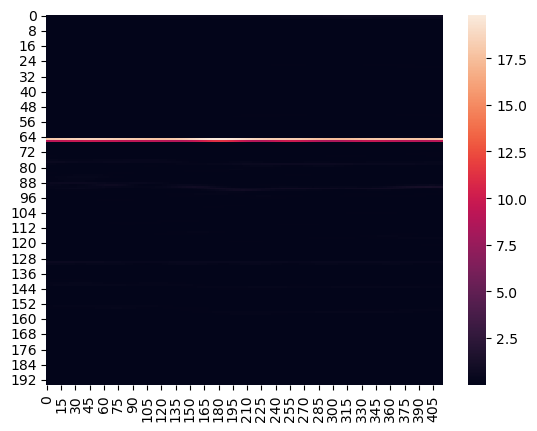

In [67]:
xyz=[]

j=33
i = 'Upstairs'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
xyz=np.concatenate((x_plt,y_plt,z_plt))


<AxesSubplot:>

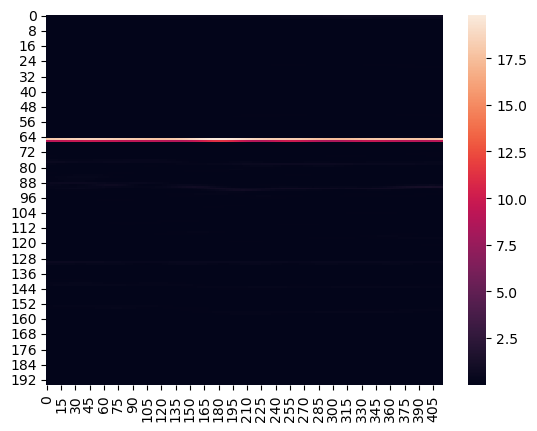

In [68]:
kf = KalmanFilter(n_dim_obs=xyz.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(xyz.T, em_vars='all').smooth(xyz.T)
n_example=min_len
sns.heatmap(xyz)

In [ ]:
C_new = np.sum([np.outer(xyz.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
sns.heatmap(C_new@mu_n.T)

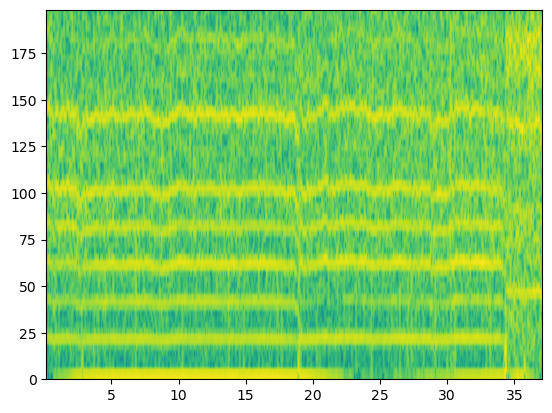

In [57]:
xyz=[]

j=33
i = 'Walking'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]



<AxesSubplot:>

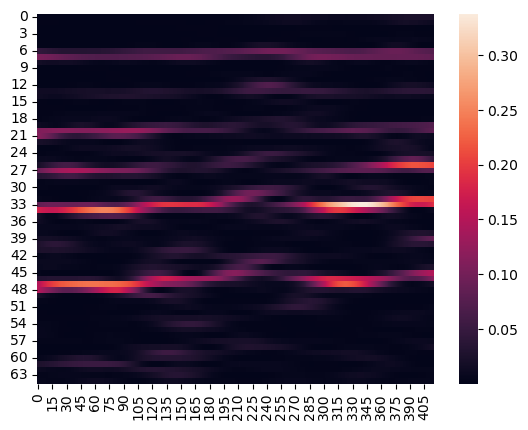

In [58]:
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(x_plt.T, em_vars='all').smooth(x_plt.T)
n_example=min_len
sns.heatmap(x_plt)

<AxesSubplot:>

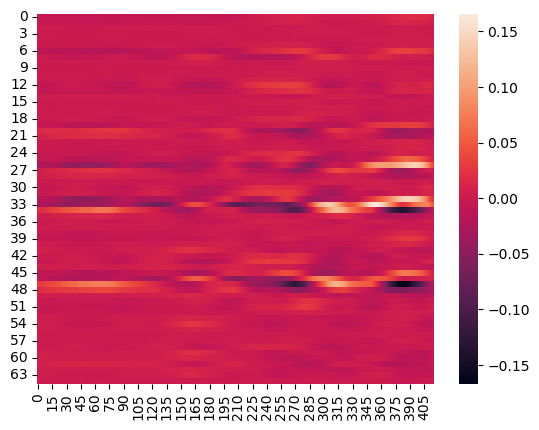

In [59]:
C_new = np.sum([np.outer(x_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
sns.heatmap(C_new@mu_n.T)

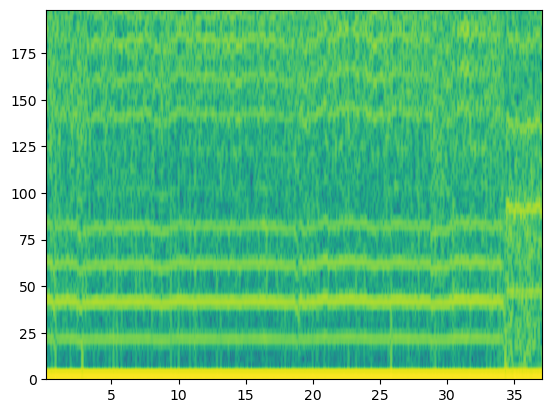

In [60]:
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

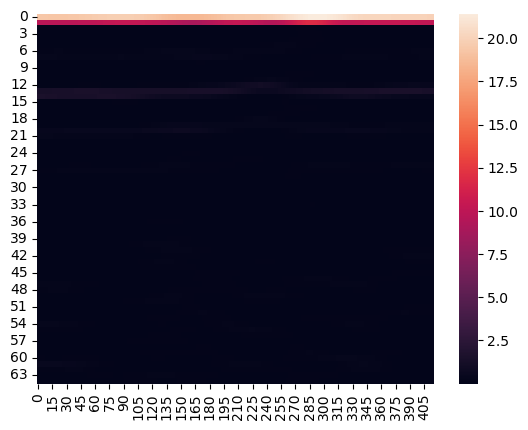

In [61]:
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(y_plt.T, em_vars='all').smooth(y_plt.T)
n_example=min_len
sns.heatmap(y_plt)

<AxesSubplot:>

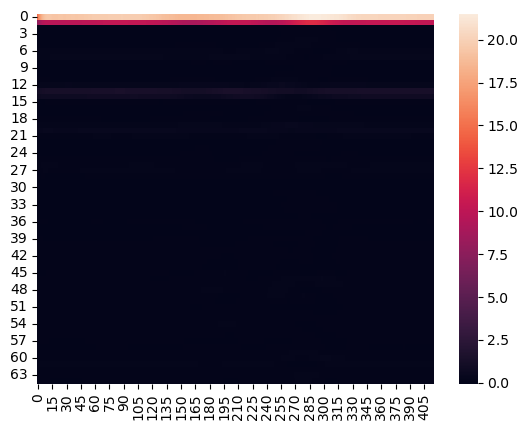

In [62]:
C_new = np.sum([np.outer(y_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
sns.heatmap(C_new@mu_n.T)

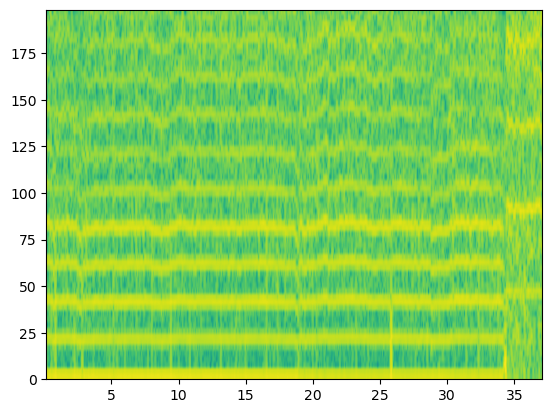

In [64]:
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

<AxesSubplot:>

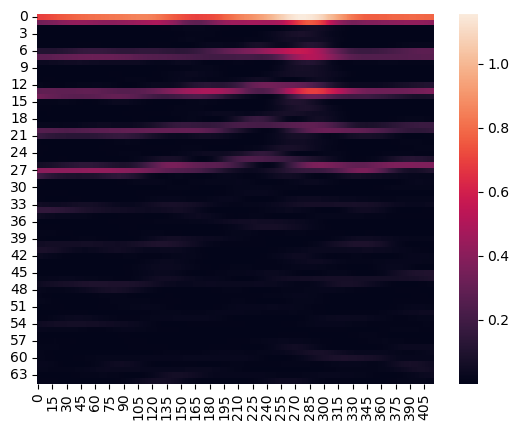

In [65]:
kf = KalmanFilter(n_dim_obs=z_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(z_plt.T, em_vars='all').smooth(z_plt.T)
n_example=min_len
sns.heatmap(z_plt)

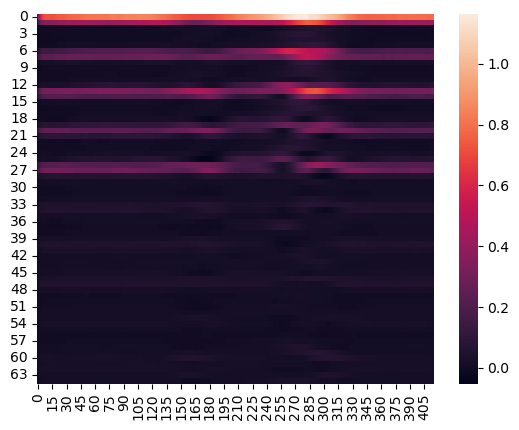

In [88]:
C_new = np.sum([np.outer(z_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
swarm_plot=sns.heatmap(C_new@mu_n.T)
fig = swarm_plot.get_figure()
fig.savefig("png/out.png") 


Text(0.5, 1.0, '2')

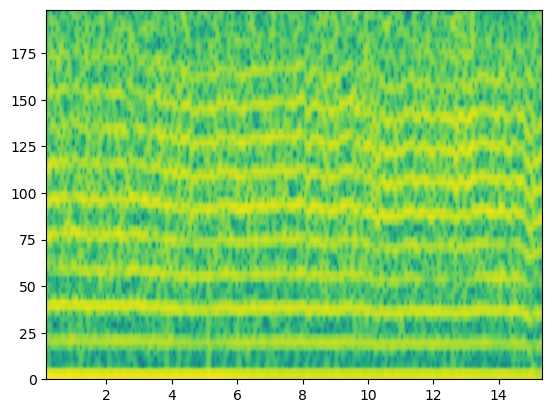

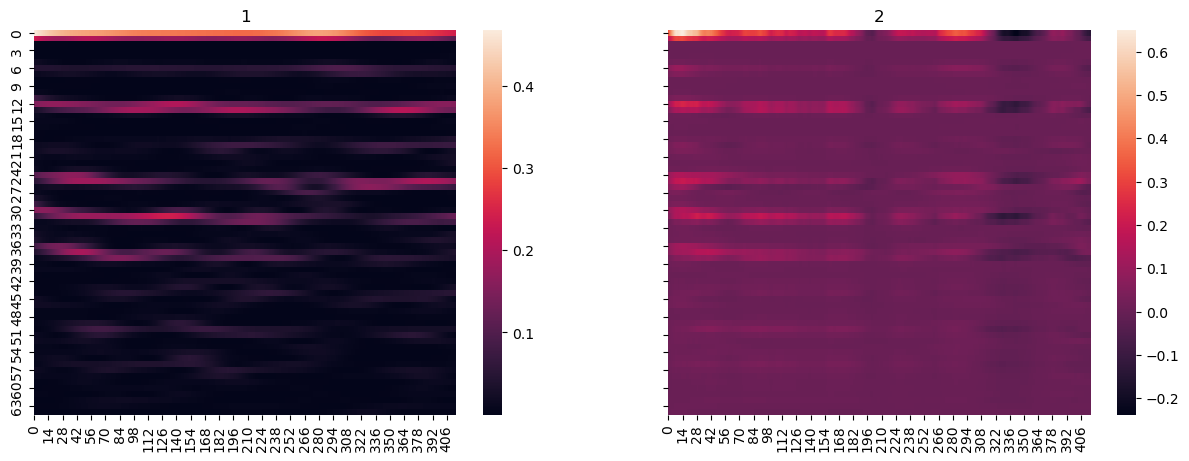

<Figure size 640x480 with 0 Axes>

In [12]:


X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 5)
mu_n, V_n=kf.em(x_plt.T, em_vars='all',n_iter=30).smooth(x_plt.T)
n_example=min_len
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(15, 5))
x_p=sns.heatmap(x_plt,ax=axes[0])
axes[0].set_title("1")
# x_fig = x_p.get_figure()
# x_fig.savefig('png/'+i+str(j)+'_x.png')
mu_x=mu_n 
plt.figure()
C_new = np.sum([np.outer(x_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
x_post=sns.heatmap(C_new@mu_n.T,ax=axes[1])
axes[1].set_title("2")
# x_post_fig = x_post.get_figure()
# x_post_fig.savefig('png/'+i+str(j)+'_xpost.png') 

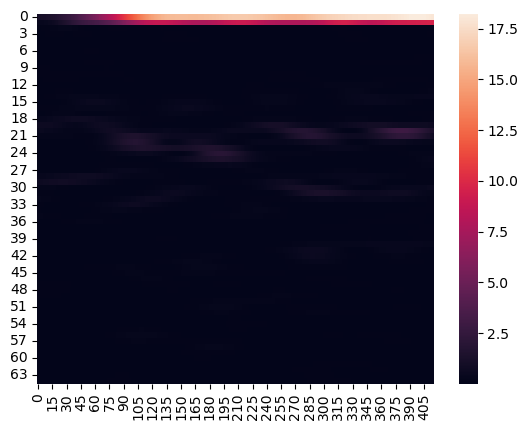

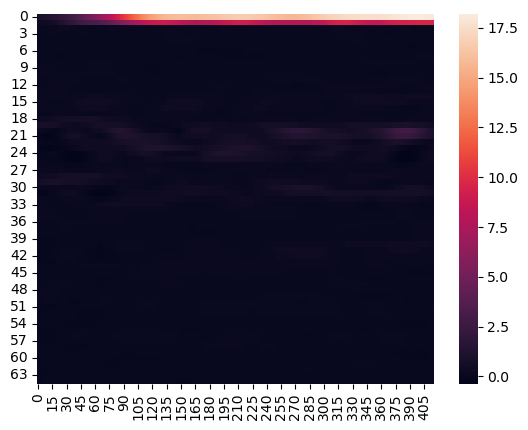

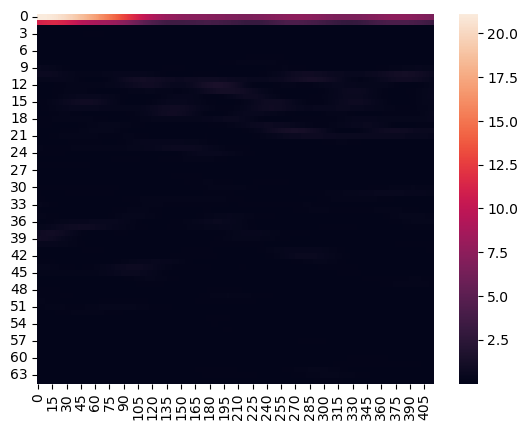

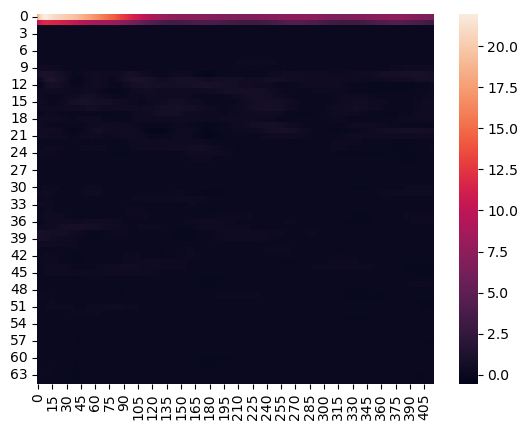

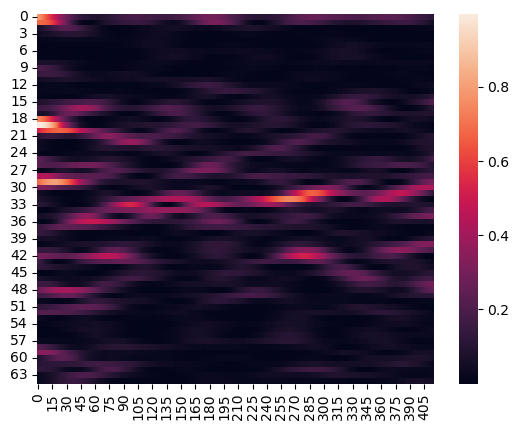

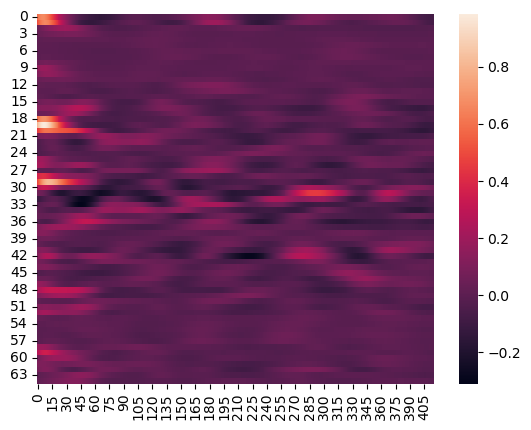

In [8]:
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 10)
mu_n, V_n=kf.em(x_plt.T, em_vars='all',n_iter=30).smooth(x_plt.T)
n_example=min_len
x_p=sns.heatmap(x_plt)
x_fig = x_p.get_figure()
x_fig.savefig('png/'+i+str(j)+'_x.png')
mu_x=mu_n 
plt.figure()
C_new = np.sum([np.outer(x_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
x_post=sns.heatmap(C_new@mu_n.T)
x_post_fig = x_post.get_figure()
x_post_fig.savefig('png/'+i+str(j)+'_xpost.png') 

#Y
plt.figure()
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
kf = KalmanFilter(n_dim_obs=y_plt.shape[0], n_dim_state = 10)
mu_n, V_n=kf.em(y_plt.T, em_vars='all',n_iter=30).smooth(y_plt.T)
n_example=min_len
y_p=sns.heatmap(y_plt)
y_fig = y_p.get_figure()
y_fig.savefig('png/'+i+str(j)+'_y.png') 
mu_y=mu_n 
plt.figure()
C_new = np.sum([np.outer(y_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
y_post=sns.heatmap(C_new@mu_n.T)
y_post_fig = y_post.get_figure()
y_post_fig.savefig('png/'+i+str(j)+'_ypost.png') 

#Z
plt.figure()
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
kf = KalmanFilter(n_dim_obs=z_plt.shape[0], n_dim_state = 10)
mu_n, V_n=kf.em(z_plt.T, em_vars='all',n_iter=50).smooth(z_plt.T)
n_example=min_len
z_p=sns.heatmap(z_plt)
z_fig = z_p.get_figure()
z_fig.savefig('png/'+i+str(j)+'_z.png') 
mu_z=mu_n
plt.figure()
C_new = np.sum([np.outer(z_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
z_post=sns.heatmap(C_new@mu_n.T)
z_post_fig = z_post.get_figure()
z_post_fig.savefig('png/'+i+str(j)+'_zpost.png') 

In [ ]:
kf = KalmanFilter(n_dim_state=10, n_dim_obs=y_plt.shape[0],
                 transition_matrices= np.eye(y_plt.shape[0]) * 0.95,
                 observation_matrices= np.eye(y_plt.shape[0])+np.random.randn(y_plt.shape[0])*.1,
                 transition_covariance= np.eye(y_plt.shape[0]),
                 observation_covariance = np.eye(y_plt.shape[0]),
                 initial_state_mean=np.random.randn(y_plt.shape[0]),
                  initial_state_covariance = np.eye(y_plt.shape[0]),em_vars='all')

In [83]:
#xyz concatenation Kalman Filter
df = pd.DataFrame()
xyz_df=pd.DataFrame()
np.random.seed(0)
for i in tmp.keys():
    for j in tmp[i]:

        xyz=[]

        #x

        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
        kf = KalmanFilter(n_dim_obs=x_plt.shape[0], n_dim_state = 30)
        mu_n, V_n=kf.em(x_plt.T, em_vars='all',n_iter=5).smooth(x_plt.T)
        n_example=min_len
        x_p=sns.heatmap(x_plt)
        x_fig = x_p.get_figure()
        x_fig.savefig('png/'+i+str(j)+'_x.png')
        mu_x=mu_n 
        plt.figure()
        C_new = np.sum([np.outer(x_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
        x_post=sns.heatmap(C_new@mu_n.T)
        x_post_fig = x_post.get_figure()
        x_post_fig.savefig('png/'+i+str(j)+'_xpost.png') 

        #Y
        plt.figure()
        Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
        y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
        kf = KalmanFilter(n_dim_obs=y_plt.shape[0], n_dim_state = 30)
        mu_n, V_n=kf.em(y_plt.T, em_vars='all',n_iter=5).smooth(y_plt.T)
        n_example=min_len
        y_p=sns.heatmap(y_plt)
        y_fig = y_p.get_figure()
        y_fig.savefig('png/'+i+str(j)+'_y.png') 
        mu_y=mu_n 
        plt.figure()
        C_new = np.sum([np.outer(y_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
        y_post=sns.heatmap(C_new@mu_n.T)
        y_post_fig = y_post.get_figure()
        y_post_fig.savefig('png/'+i+str(j)+'_ypost.png') 

        #Z
        plt.figure()
        Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
        z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
        kf = KalmanFilter(n_dim_obs=z_plt.shape[0], n_dim_state = 30)
        mu_n, V_n=kf.em(z_plt.T, em_vars='all',n_iter=5).smooth(z_plt.T)
        n_example=min_len
        z_p=sns.heatmap(z_plt)
        z_fig = z_p.get_figure()
        z_fig.savefig('png/'+i+str(j)+'_z.png') 
        mu_z=mu_n
        plt.figure()
        C_new = np.sum([np.outer(z_plt.T[k], mu_n[k]) for k in range(n_example)], axis = 0) @ np.linalg.inv(np.sum([V_n[k] + np.outer(mu_n[k],mu_n[k]) for k in range(n_example)], axis = 0))
        z_post=sns.heatmap(C_new@mu_n.T)
        z_post_fig = z_post.get_figure()
        z_post_fig.savefig('png/'+i+str(j)+'_zpost.png') 


        xyz=np.concatenate((mu_x.T,mu_y.T,mu_z.T)).flatten(order='F').tolist()
        cur=xyz
        cur.append(i)
        df[i+str(j)]=cur 
        df.to_csv("df.csv",index=False)

/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3734754382.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3734754382.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3734754382.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [86]:
mu_x

array([[-1.11146847, -0.46439748,  0.06578634, -0.26004455,  0.03908069],
       [-1.14362126, -0.43006245,  0.09934215, -0.22054   ,  0.09603762],
       [-1.17203168, -0.39863071,  0.1218527 , -0.17054969,  0.15063452],
       ...,
       [ 2.4688625 , -0.06695053, -0.60114867, -0.87303044,  0.0389654 ],
       [ 2.17415222, -0.03121113, -0.48540063, -0.71879188,  0.01330706],
       [ 1.89934302,  0.02926566, -0.3869491 , -0.54771508,  0.02719085]])

In [77]:
mu_y

array([[14.97136084,  7.37420534, -1.59570452, -0.26508857,  1.23138229],
       [15.86449329,  7.8119697 , -1.68954577, -0.25369265,  1.26942635],
       [16.71302316,  8.22587217, -1.7296229 , -0.20324543,  1.22931307],
       ...,
       [20.08629929,  9.92644   , -0.59113475, -0.13428247, -0.19806443],
       [20.07548334,  9.91577837, -0.51654832, -0.15455278, -0.17983681],
       [20.0680648 ,  9.90472815, -0.44281166, -0.17241667, -0.16836952]])

In [78]:
mu_z

array([[ 0.33154508, -0.31916078, -0.00914572,  0.05537636, -0.67807699],
       [ 0.53623851, -0.28138374, -0.01070946,  0.00609753, -0.80151945],
       [ 0.67013785, -0.26084808, -0.02484366, -0.02338596, -0.89738999],
       ...,
       [ 0.67811111,  0.57377301, -0.58774736, -0.44873619, -0.40362232],
       [ 0.69509005,  0.5540865 , -0.53186355, -0.41062057, -0.35944304],
       [ 0.71192858,  0.53978332, -0.48417956, -0.37787994, -0.32486841]])

In [99]:
np.array(xyz[:-1]).reshape((1248,5))

array([[-1.11146847e+00, -4.64397476e-01,  6.57863370e-02,
        -2.60044551e-01,  3.90806934e-02],
       [ 1.49713608e+01,  7.37420534e+00, -1.59570452e+00,
        -2.65088575e-01,  1.23138229e+00],
       [ 3.31545082e-01, -3.19160779e-01, -9.14572128e-03,
         5.53763623e-02, -6.78076988e-01],
       ...,
       [ 1.89934302e+00,  2.92656581e-02, -3.86949103e-01,
        -5.47715085e-01,  2.71908465e-02],
       [ 2.00680648e+01,  9.90472815e+00, -4.42811664e-01,
        -1.72416672e-01, -1.68369521e-01],
       [ 7.11928583e-01,  5.39783319e-01, -4.84179559e-01,
        -3.77879936e-01, -3.24868408e-01]])

In [92]:
df = pd.DataFrame()
xyz=np.concatenate((mu_x.T,mu_y.T,mu_z.T)).flatten(order='F').tolist()
cur=xyz
cur.append(i)
df[i+str(j)]=cur 
df.to_csv("df.csv",index=False)

<AxesSubplot:>

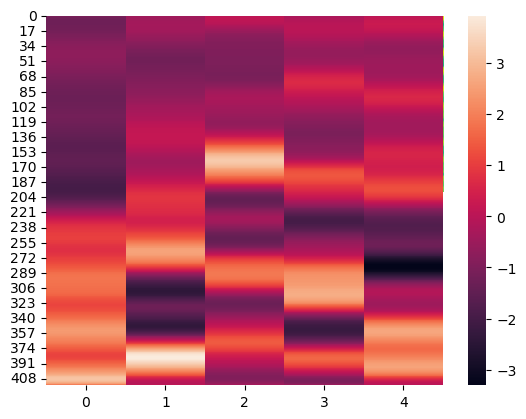

In [12]:
xyz=[]

j=33
i = 'Walking'
X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

xyz=np.concatenate((x_plt,y_plt,z_plt))
xyzt = xyz.T
kf = KalmanFilter(n_dim_obs=xyzt.shape[1], n_dim_state = 5)
kf = kf.em(xyzt, em_vars='all')
sns.heatmap(kf.smooth(xyzt)[0])

In [98]:
act=tmp.keys()

[[0.00057819 0.00060931 0.00064217 ... 0.02264835 0.02246663 0.0222692 ]
 [0.00141044 0.00143996 0.00146335 ... 0.01130045 0.01104869 0.01082105]
 [0.00098312 0.00096428 0.00094617 ... 0.0002531  0.00022471 0.00019971]
 ...
 [0.01033152 0.01006435 0.0097855  ... 0.00449257 0.00439383 0.00428824]
 [0.00237036 0.00252627 0.0026823  ... 0.00364379 0.0037756  0.00389736]
 [0.00574332 0.00549475 0.00525246 ... 0.00372615 0.0036054  0.00348163]]


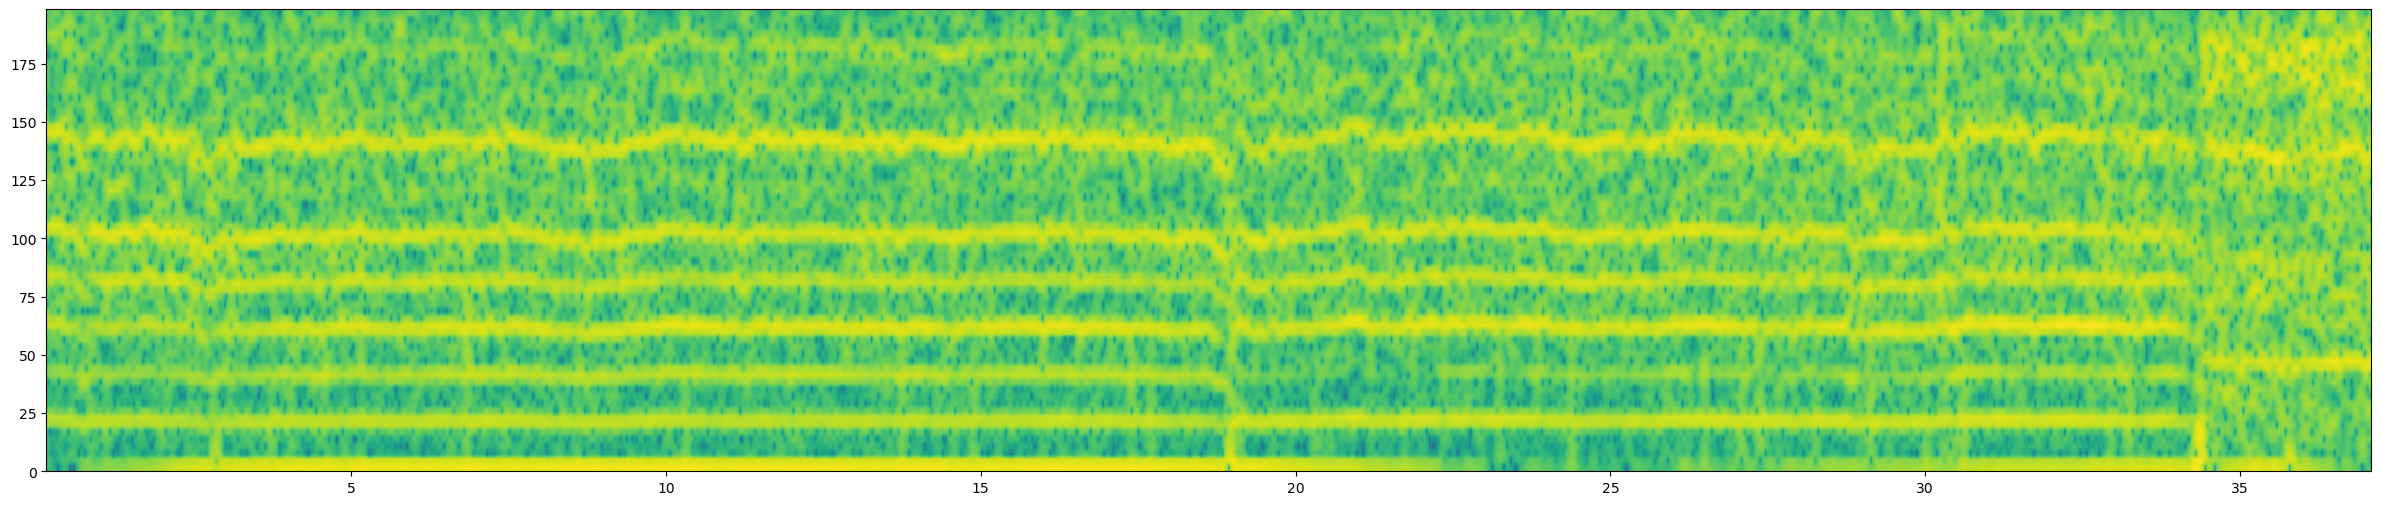

In [96]:
X=data[(data['user']==33)&(data['activity']==act[0])]['x-axis']
x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
print(x_plt)
Y=data[(data['user']==33)&(data['activity']==act[0])]['y-axis']
y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
print(y_plt)
Z=data[(data['user']==33)&(data['activity']==act[0])]['z-axis']
z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]

[[0.33825286 0.33990432 0.34134595 ... 0.2509072  0.24864689 0.24635207]
 [0.21907311 0.22359761 0.227954   ... 0.18425878 0.18044538 0.1762817 ]
 [0.01901673 0.02024369 0.02146065 ... 0.02545991 0.02629993 0.0271062 ]
 ...
 [0.0037363  0.00353699 0.00334869 ... 0.00081919 0.00070507 0.00060631]
 [0.0046934  0.00443489 0.00418004 ... 0.00562071 0.0057271  0.00584131]
 [0.00431417 0.00418995 0.00406343 ... 0.00245267 0.00238088 0.00231859]]
[[1.87401394e+01 1.87689454e+01 1.87963202e+01 ... 1.92815302e+01
  1.92737334e+01 1.92645880e+01]
 [9.97704754e+00 1.00536227e+01 1.01276285e+01 ... 1.06281852e+01
  1.06152187e+01 1.05965304e+01]
 [6.38218866e-02 6.73019278e-02 7.07446604e-02 ... 5.37812329e-02
  5.37551098e-02 5.36031301e-02]
 ...
 [3.32871429e-02 3.21135189e-02 3.09318439e-02 ... 3.58615947e-02
  3.50285243e-02 3.41687660e-02]
 [6.84032731e-02 6.93552108e-02 7.02798739e-02 ... 1.33716018e-02
  1.26088095e-02 1.18545487e-02]
 [7.80870529e-03 8.11664336e-03 8.49779999e-03 ... 1.537

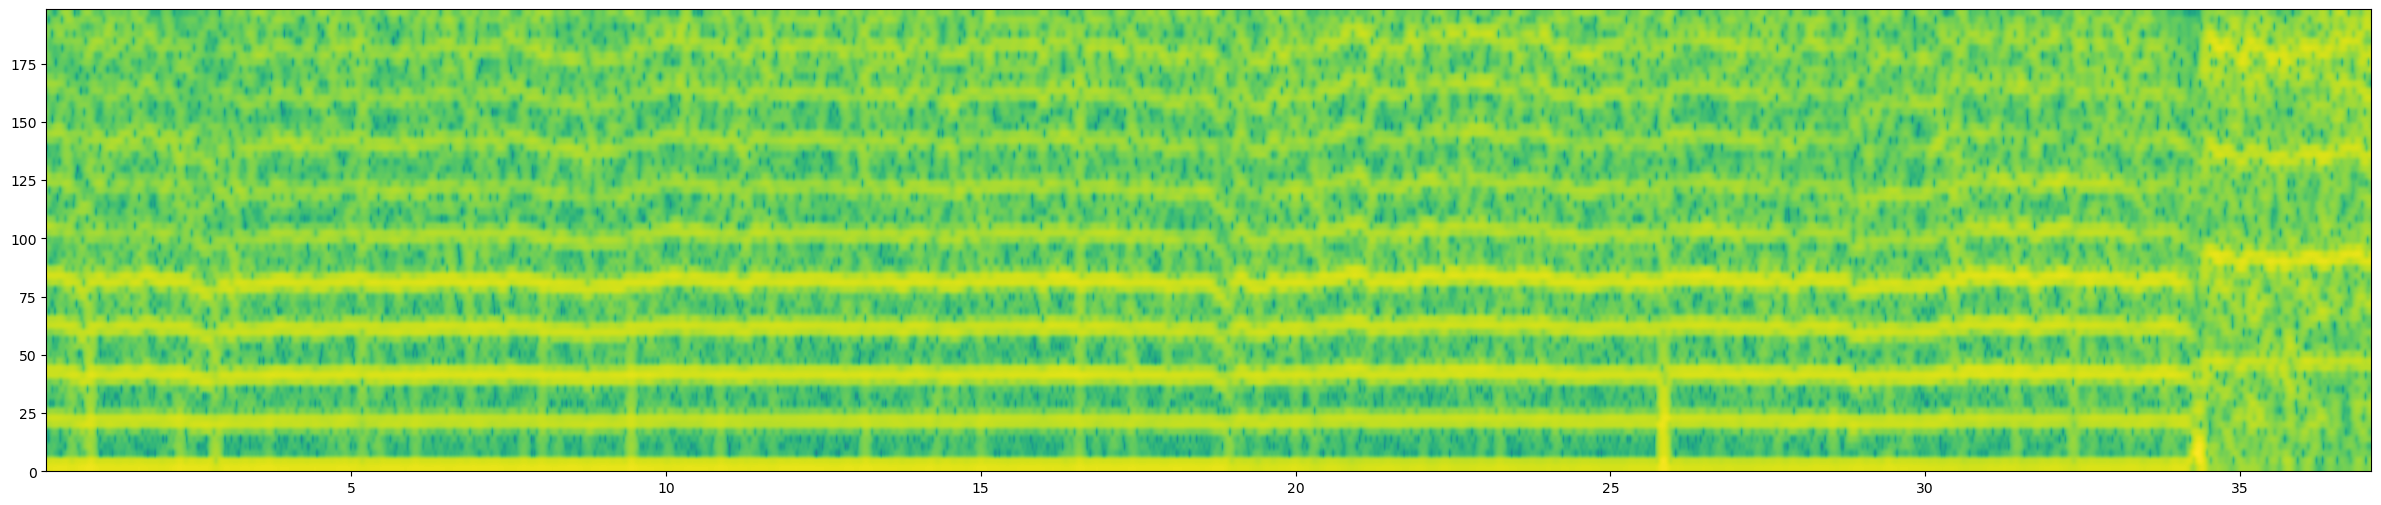

In [95]:
#user 33 all activities
for i in tmp.keys():
    xyz=[]
    X=data[(data['user']==33)&(data['activity']==i)]['x-axis']
    x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
    print(x_plt)
    Y=data[(data['user']==33)&(data['activity']==i)]['y-axis']
    y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
    print(y_plt)
    Z=data[(data['user']==33)&(data['activity']==i)]['z-axis']
    z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
    
    print(z_plt)
    xyz=np.concatenate((x_plt,y_plt,z_plt))

/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3016443696.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3016443696.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i+str(j)]=cur
/var/folders/x3/lvyg3rhj34dgz16q_h6kfpb80000gn/T/ipykernel_16171/3016443696.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

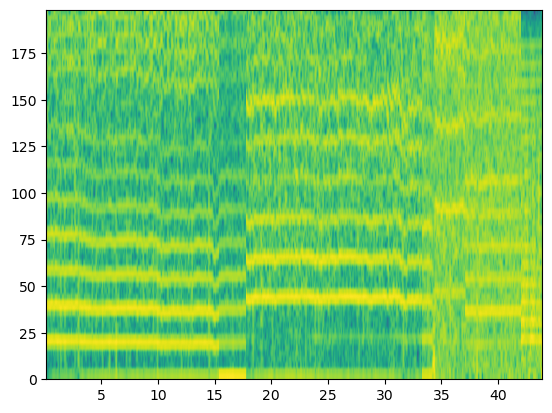

In [6]:
#SVM alone
all=[]
df = pd.DataFrame()
for i in tmp.keys():
    for j in tmp[i]:
        xyz=[]
        X=data[(data['user']==j)&(data['activity']==i)]['x-axis']
        x_plt=(plt.specgram(X,Fs=400,NFFT=129)[0])[:,:min_len]
        Y=data[(data['user']==j)&(data['activity']==i)]['y-axis']
        y_plt=(plt.specgram(Y,Fs=400,NFFT=129)[0])[:,:min_len]
        Z=data[(data['user']==j)&(data['activity']==i)]['z-axis']
        z_plt=(plt.specgram(Z,Fs=400,NFFT=129)[0])[:,:min_len]
        xyz=np.concatenate((x_plt,y_plt,z_plt))
        cur=xyz.flatten(order='F').tolist()
        cur.append(i)
        df[i+str(j)]=cur       

In [8]:
df.to_csv("df_SVM.csv",index=False)
df


Downstairs1 Downstairs3 Downstairs4 Downstairs5 Downstairs6 Downstairs7  \
0        0.987685    4.774373    2.803214    0.204795    0.001642    9.547809   
1        0.305623    2.560982    1.669704    0.107707    0.100159     4.83029   
2        0.045049    0.022348     0.00422     0.00021    0.019745    0.010427   
3        0.053702    0.030216     0.01024    0.005805    0.004266    0.012651   
4        0.009457    0.026203    0.004596    0.021765    0.027669    0.046981   
...           ...         ...         ...         ...         ...         ...   
81116    0.021917    0.029051    0.021067    0.045419    0.000605    0.011689   
81117    0.026205    0.009667    0.031402    0.028756    0.004326      0.0018   
81118    0.018653    0.063866     0.01948    0.024845    0.007598    0.013588   
81119    0.045344    0.279307    0.007809    0.005949     0.00664    0.004943   
81120  Downstairs  Downstairs  Downstairs  Downstairs  Downstairs  Downstairs   

      Downstairs8 Downstairs10 Downstairs11 Downstairs12  ... Walking27  \
0        0.284593     0.333945      5.28194     0.141479  ...  2.679551   
1         0.29509     0.229226     2.850085      0.11215  ...   1.39053   
2        0.155119     0.010381     0.000647     0.004889  ...  0.001329   
3        0.006166     0.000128     0.030613     0.014029  ...  0.003266   
4        0.034881     0.026107      0.07016     0.024004  ...  0.000971   
...           ...          ...          ...          ...  ...       ...   
81116    0.011567     0.006294     0.000378     0.235807  ...  0.006384   
81117    0.015674      0.09902      0.00031     0.474947  ...  0.001539   
81118    0.007015     0.072688     0.000246     0.425897  ...  0.005229   
81119    0.018107     0.002404     0.000287     0.122128  ...  0.001807   
81120  Downstairs   Downstairs   Downstairs   Downstairs  ...   Walking   

      Walking28 Walking29 Walking30 Walking31 Walking32 Walking33 Walking34  \
0      0.011041  4.230765  14.55461  0.023521  0.087016  0.000578  0.085896   
1      0.044312  2.148384   7.71884  0.012633  0.067401   0.00141  0.075191   
2      0.057984  0.002806  0.003501   0.00646  0.004206  0.000983   0.00422   
3       0.04007  0.001093  0.035492   0.03503  0.001915   0.00068  0.004197   
4      0.121169  0.001109  0.064376  0.052435  0.009082  0.000987  0.003489   
...         ...       ...       ...       ...       ...       ...       ...   
81116   0.00014  0.013404  0.013321  0.005199  0.005737  0.040843  0.052338   
81117  0.004838  0.001489  0.004171  0.006368  0.002088  0.045817  0.009857   
81118  0.006845  0.006874  0.006064  0.006385  0.031654    0.0367  0.023571   
81119  0.001174  0.010064  0.016264  0.015021  0.065067  0.010841    0.0565   
81120   Walking   Walking   Walking   Walking   Walking   Walking   Walking   

      Walking35 Walking36  
0      2.965157  0.468008  
1      1.471704  0.239094  
2      0.000157  0.002158  
3       0.00296  0.000753  
4      0.004297  0.001301  
...         ...       ...  
81116  0.038653  0.000121  
81117  0.020046  0.026895  
81118  0.000908  0.015313  
81119  0.000498   0.02091  
81120   Walking   Walking  

[81121 rows x 179 columns]

In [9]:
label=df.to_numpy()[-1]
dp=df.to_numpy()[:-1]

In [10]:
len(label)

179

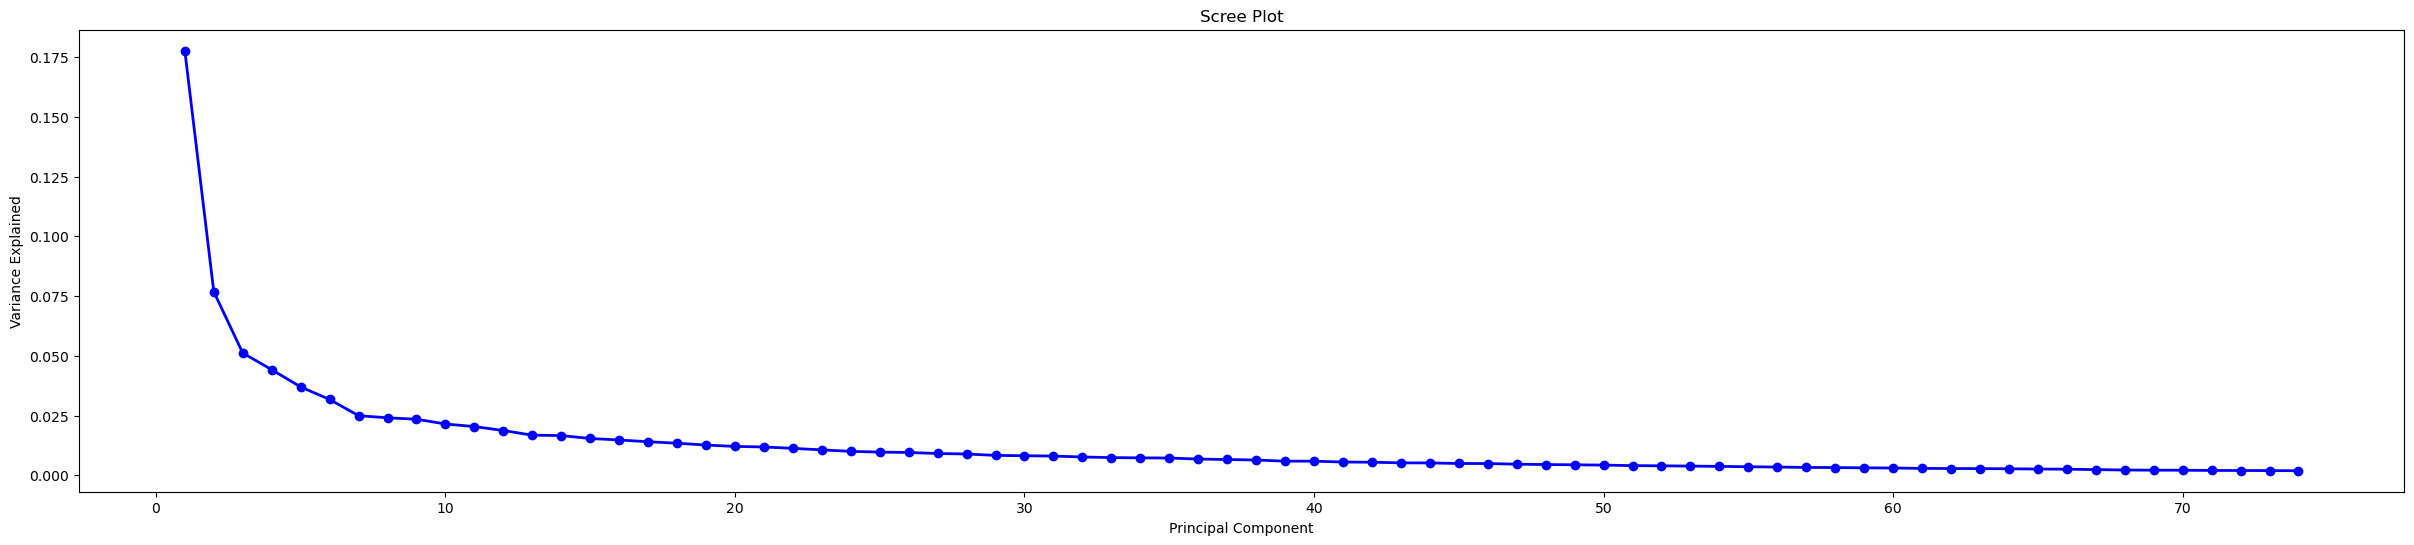

In [64]:
scaler = MinMaxScaler()
data_pca=dp.T
data_rescaled = scaler.fit_transform(data_pca)
pca = PCA(n_components=0.95).fit(data_rescaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

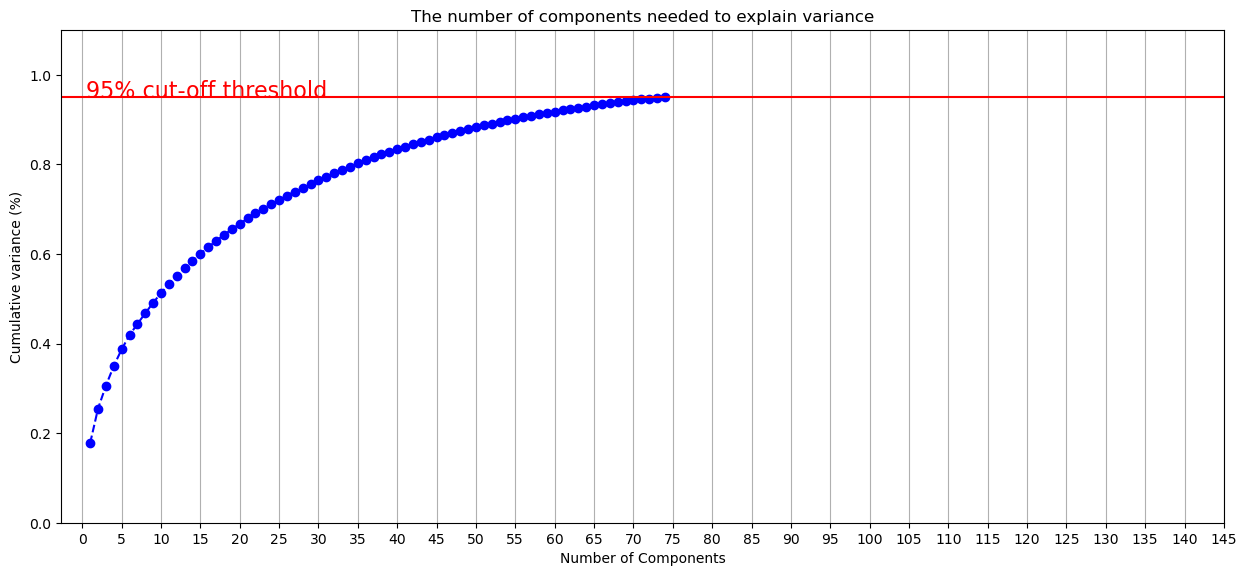

In [81]:
# % matplotlib inline
plt.rcParams["figure.figsize"] = (30,6)

fig, ax = plt.subplots(figsize=(15,6.4))
xi = np.arange(pca.n_components_) + 1
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 150, step=5)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components Needed to Explain Variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [69]:
dp_pca=pca.fit_transform(data_rescaled)

In [70]:
dp_pca.shape

(179, 74)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(dp_pca,label,test_size=0.3)

In [63]:
x_train.shape

(125, 74)

In [62]:
x_test.shape

(54, 74)

In [59]:
clf = svm.SVC(kernel='rbf') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import statistics
clf = svm.SVC(kernel='rbf') 
cv = ShuffleSplit(n_splits=21, test_size=0.3, random_state=2)
l=cross_val_score(clf, dp_pca,label, cv=cv)
statistics.median(l)


0.7222222222222222

In [78]:
#cv.get_n_splits(dp_pca)
idx=np.where(l==statistics.median(l))[0][0]

In [79]:
train=[]
test=[]
for i, (train_index, test_index) in enumerate(cv.split(dp_pca)):
    train.append(train_index)
    test.append(test_index)
x_train=dp_pca[train[idx]]
y_train=label[train[idx]]
y_test=label[test[idx]]
x_test=dp_pca[test[idx]]
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


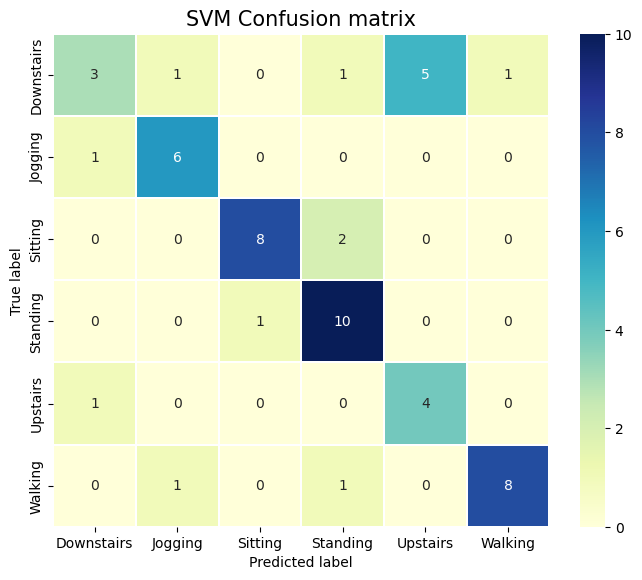

In [82]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6.4))
labels = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt="d", cmap = "YlGnBu")
plt.title("SVM Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()